# Eigenvalues and Eigenvectors

We briefly discuss some algorithms for finding some eigenvalues and eigenvectors of square matrices.

To read more about this topic see &sect; 4.6 of TAK, which we follow somewhat.

In [148]:
# Standard imports
import numpy as np
import matplotlib.pyplot as plt
import math as m
from mpmath import mp, iv
from scipy import linalg

## Review of the definitions

We review the basic definitions related to eigenvalues and eigenvectors. Any textbook in linear algebra will give a more expansive explaination of these concepts.

Let $A$ be a $n \times n$ matrix. A non-zero vector $v \in {\mathbb R}^n$ is an *eigenvector* if there is a real number $\lambda$ such that $A v = \lambda v$. This number $\lambda$ is called an *eigenvalue* of $A$ and is *eigenvalue associated* to $v$.

An eigenvector determines an eigenvalue. In the other direction, if you have an eigenvalue $\lambda$, you can determine all the associated eigenvectors by solving the equation $A v = \lambda v$. This can be written as the matrix equation 
$$(A - \lambda I) v = 0.$$
The set of solutions to this equation forms a subspace of ${\mathbb R}^n$ called the *eigenspace* of $\lambda$. This eigenspace consists of the zero vector and all eigenvectors whose eigenvalue is $\lambda$.

From the fact that we are only considering non-zero vectors $v$, it can be seen that eigenvalues are the solutions to the *characteristic equation*:
$$\det(A-\lambda I)=0.$$
It follows that an $n \times n$ matrix can have at most $n$ eigenvalues. The function of $\lambda$, $\det(A-\lambda I)$ is a polynomial and the roots are the eigenvalues. The *algebraic multiplicity* of an eigenvalue $r$ is the number of times the term $\lambda-r$ can be factored out of this polynomial. The *geometric multiplicity* of an eigenvalue is the dimension of the associated eigenspace. The geometric multiplicity of an eigenvalue is always less than or equal its algebraic multiplicity.

**Remark.** Since a non-zero scalar multiple of an eigenvector is an eigenvector, it is common to look for eigenvectors with length one.

## Finding a dominant eigenvalue and eigenvector

An eigenvalue of a matrix $A$ is a called *dominant* if its absolute value is larger than the absolute values of the other eigenvalues of $A$. We will first consider trying to find a dominant eigenvalue.

### Diagonal Matrices

Diagonal matrices are the simplest to understand. Let $D$ be the matrix
$$D=\left(\begin{matrix} 
d_0 & 0 & \ldots & & \ldots &  0 \\
0 & d_1 & 0 & & &  \vdots \\
0 & 0 & d_2 & 0 &  \\
\vdots  &   &  \ddots  & \ddots & \ddots & \vdots \\
\vdots &  & & 0 & d_{n-2} & 0 \\
0 & \ldots & &  & 0 & d_{n-1} \\
\end{matrix}\right).$$

Observe that if $e^k$ is the standard basis vector, which has all zero entries except in position $k$, where there is a one. Then we have 
$$D e^k = d_k e^k,$$
so $e^k$ is an eigenvector with eigenvalue $d_k$.

It follows that the set of eigenvalues is the set of diagonal elements. The eigenspace associated to an eigenvalue $\lambda$ is 
$$\textrm{span}~\{e^k:~d_k=\lambda\}.$$
(So typically, the eigenspace of $d_j$ is the set of all scalar multiples of $e_j$. But, for example if $i \neq j$ but $d_i=d_j$, then the eigenspace will include vectors of the form $a e^i+b e^j$.)

### Iteration

*Iteration* means repeatedly applying an operation. We will be repeatedly applying matrix multiplication.

Let $D$ be the diagonal matrix above, and let $x \in {\mathbb R}^n$ be a column vector. Iteratively multiplying by $D$ produces the sequence of vectors defined by $x_0=x$ and
$$x^{k+1} = D x^{k} \quad \text{for integers $k \geq 0$}.$$
Since $D$ is a diagonal matrix, we can see that
$$x^k=\left(\begin{matrix} d_0^k x_0 \\ d_1^k x_1 \\ \vdots \\ d_{n-1}^k x_{n-1}\end{matrix}\right).$$
Observe that the $j$-th entry of $x^k$ grows exponentially with constant $d_j$.

Assuming all entries of our initial vector $x$ are non-zero, observe that for $k$ very large, the entry of $x^k$ with largest absolute value will be the entry $j$ where $|d_j|$ is largest. (This $d_j$ is the *dominant eigenvalue*.) To see this clearly, we'll do an experiment. To keep entries from blowing up, we'll rescale our vectors to make them unit length.

In [6]:
# A diagonal matrix.
# Note entry with largest absolute value is in the second position.
D = np.diag([-1, -4, 0.25, 3])
print(D)

[[-1.    0.    0.    0.  ]
 [ 0.   -4.    0.    0.  ]
 [ 0.    0.    0.25  0.  ]
 [ 0.    0.    0.    3.  ]]


In [12]:
# Build a vector with random entries in (-1, 1)
x = 2*np.random.random(4)-1
x

array([ 0.13541197,  0.40789263,  0.87815274, -0.87850046])

We'll arrange the $x^k$ vectors we compute under interation in a list `x_list`. Here `x_list[k]` will store $x^k$, except we will rescale all our vectors to have unit length.

The norm of a vector $x$ can be computed with
```python
np.linalg.norm(x)
```
Dividing by this norm gives a unit vector. (We are doing this rescaling to keep entries from blowing up.)

In [17]:
x_list = []
x_list.append(x/np.linalg.norm(x))
x_list

[array([ 0.10302247,  0.31032783,  0.66810532, -0.66836987])]

We will compute up to $x^{20}$:

In [18]:
for k in range(0,20):
    x_k = x_list[k]
    x_next = D @ x_k
    x_list.append(x_next / np.linalg.norm(x_next))
x_list

[array([ 0.10302247,  0.31032783,  0.66810532, -0.66836987]),
 array([-0.0435356 , -0.52455774,  0.07058258, -0.84732634]),
 array([ 0.0132069 ,  0.63651656,  0.00535296, -0.77113137]),
 array([-3.83908224e-03, -7.40109834e-01,  3.89009701e-04, -6.72474940e-01]),
 array([ 1.07162466e-03,  8.26364112e-01,  2.71466175e-05, -5.63135157e-01]),
 array([-2.88679519e-04, -8.90440109e-01,  1.82822232e-06, -4.55100351e-01]),
 array([ 7.56801046e-05,  9.33749658e-01,  1.19821504e-07, -3.57926766e-01]),
 array([-1.94736323e-05, -9.61071477e-01,  7.70796999e-09, -2.76299865e-01]),
 array([ 4.95180411e-06,  9.77534674e-01,  4.90000491e-10, -2.10774670e-01]),
 array([-1.25015992e-06, -9.87175295e-01,  3.09270602e-11, -1.59640025e-01]),
 array([ 3.14297044e-07,  9.92725081e-01,  1.94380804e-12, -1.20403128e-01]),
 array([-7.88246273e-08, -9.95888265e-01,  1.21875107e-13, -9.05900819e-02]),
 array([ 1.97416286e-08,  9.97680898e-01,  7.63090542e-15, -6.80648604e-02]),
 array([-4.94041645e-09, -9.986935

The last entry printed above is $x^{20}$. Observe that the entry with the largest absolute value is the second entry, and the other entries are very close to zero. Thus, we have found an eigenvector of the form $(0,\pm 1,0,0)$.

Since $x^{20}$ is a unit vector close to an eigenvector, the associated eigenvalue can be (nearly) recovered by computing
$$x^{20} \cdot (D x^{20}).$$
(This works because $D x^{20} \approx \lambda x^{20}$, so 
$$x^{20} \cdot (D x^{20}) \approx x^{20} \cdot (\lambda x^{20}) = \lambda (x^{20} \cdot x^{20})= \lambda.$$

In [20]:
x20 = x_list[20]
x20

array([ 3.01926519e-13,  9.99976676e-01,  1.78079703e-24, -6.82985177e-03])

In [22]:
eigvalue = x20 @ (D @ x20)
eigvalue

-3.9996734718734936

Thus, we have an approximate eigenvalue--eigenvector pair `(eigvalue, x20)`.

### Diagonalizable matrices

Of course, it is easy to find eigenvectors in a diagonal matrix. We looked at them because the method we used above makes it easy to see how iteration works there.

A slightly more general setting is the case of diagonalizable matrices. A $n \times n$ matrix $A$ is diagonalizable if it has the form 
$$A = P D P^{-1},$$
where $P$ is an invertible $n \times n$ matrix and $D$ is a diagonal matrix as above. In this case, the diagonal entries $d_j$ of $D$ are eigenvalues associated to eigenvectors of the form $v^j = P e^j$. This is because
$$A v^j = P D P^{-1} P e^j = P D e^j = P d_j e^j = d_j P e^j = d_j v^j.$$

For a diagonalizable matrix, we can apply the same algorithm to find the dominant eigenvalue (the eigenvalue with larger absolute value than any other).

It is a well-known and very useful fact that **symmetric matrices are diagonalizable**. A symmetric matrix is a matrix $A$ which equals its transpose.

We will use this to give an example of an $n \times n$ matrix with $n=4$.

In [127]:
n = 4

We computed a random $4 \times 4$ matrix $A$ with entries in the interval $(-1,1)$ using the command
```python
A = (2*np.random.random(n**2)-1).reshape(4,4)
```
Below we show what we ended up with:

In [128]:
A = np.array([[-0.25171678,  0.58924155, -0.32522934,  0.92260052],
              [ 0.58924155,  0.99124496, -0.85124213, -0.93359258],
              [-0.32522934, -0.85124213,  0.74766801, -0.79890941],
              [ 0.92260052, -0.93359258, -0.79890941,  0.66430218]])

array([[-0.25171678,  0.58924155, -0.32522934,  0.92260052],
       [ 0.58924155,  0.99124496, -0.85124213, -0.93359258],
       [-0.32522934, -0.85124213,  0.74766801, -0.79890941],
       [ 0.92260052, -0.93359258, -0.79890941,  0.66430218]])

To make the matrix symmetric, we fix it by setting $a_{j,i}=a_{i,j}$ for $j>i$.

In [29]:
for i in range(n):
    for j in range(i+1,n):
        A[j,i]=A[i,j]
A

array([[-0.25171678,  0.58924155, -0.32522934,  0.92260052],
       [ 0.58924155,  0.99124496, -0.85124213, -0.93359258],
       [-0.32522934, -0.85124213,  0.74766801, -0.79890941],
       [ 0.92260052, -0.93359258, -0.79890941,  0.66430218]])

Now the matrix is symmetric. We also choose a random initial vector using
```python
x = 2*np.random.random(n)-1
```
Again, we just write what we computed below.

In [129]:
x = np.array([-0.79842236, -0.50141247,  0.21444716,  0.64910438])
x

array([-0.79842236, -0.50141247,  0.21444716,  0.64910438])

Now we will iterate it for a while, continually rescaling so that the vector has unit length. We define $x_0 = x / \|x\|$ and then define 
$$x_{k+1} = \frac{1}{\|A x_k\|} A x_k \quad \text{for $k \geq 0$}.$$
We'll repeat this operation $100$ times, discarding intermediate values.

In [130]:
k = 0
x_k = x / np.linalg.norm(x)
for i in range(100):
    temp = A @ x_k
    k += 1
    x_k = temp / np.linalg.norm(temp)
print("x_{} = {}".format(k, x_k))

x_100 = [-0.37105153 -0.55555666  0.68570837 -0.28893183]


Note that because we are continually dividing by the norm, $x_{100}$ is a unit vector:

In [131]:
np.linalg.norm(x_k)

1.0

Since $\|x_k\|=1$, assuming $x_k$ is close to a eigenvector, the associated eigenvalue can be computed with:

In [132]:
eigvalue = x_k @ A @ x_k
eigvalue

1.949953569225044

To verify that $x_{100}$ is nearly an eigenvector with eigenvalue $\lambda$, we could compute 
$$A x_{100} - \lambda x_100$$
and check that all entries are small. We do that below:

In [133]:
A @ x_k - eigvalue * x_k

array([-5.05750983e-06,  1.87368278e-05,  3.16585740e-06, -2.20187500e-05])

The small values above suggest that `(eigvalue, x_k)` is approximately an eigenvalue&ndash;eigenvector pair.

We can improve it further by iterating more.

In [134]:
for i in range(100):
    temp = A @ x_k
    k += 1
    x_k = temp / np.linalg.norm(temp)
print("x_{} = {}".format(k, x_k))

x_200 = [-0.37108227 -0.55544272  0.6857276  -0.28906571]


In [135]:
eigvalue = x_k @ A @ x_k
eigvalue

1.9499535745247234

In [136]:
A @ x_k - eigvalue * x_k

array([-7.54369012e-10,  2.79627721e-09,  4.71855000e-10, -3.28532568e-09])

The above difference is even smaller. Continuing further:

In [137]:
for i in range(200):
    temp = A @ x_k
    k += 1
    x_k = temp / np.linalg.norm(temp)
print("x_{} = {}".format(k, x_k))

x_400 = [-0.37108228 -0.55544271  0.68572761 -0.28906573]


In [138]:
eigvalue = x_k @ A @ x_k
eigvalue

1.9499535745247238

In [139]:
A @ x_k - eigvalue * x_k

array([ 0.00000000e+00, -2.22044605e-16,  2.22044605e-16, -1.11022302e-16])

The above difference is on the order of round off error, so we can't expect to do much better. We store off the eigenvector:

In [140]:
eigenvector = x_k
eigenvector

array([-0.37108228, -0.55544271,  0.68572761, -0.28906573])

### The error in eigenvalue and eigenvector approximation

Lets look at the error in computation of eigenvalues and eigenvectors. Here we make a list of approximate eigenvalues, computed as
$$x_k \cdot (A x^k).$$
We'll store these in a list.

In [141]:
k_list = []
approx_eigenvalues = []
approx_eigenvectors = []
k = 0
x_k = x / np.linalg.norm(x)
k_list.append(k)
approx_eigenvalues.append(x_k @ A @ x_k)
approx_eigenvectors.append(x_k)
for i in range(100):
    temp = A @ x_k
    k += 1
    x_k = temp / np.linalg.norm(temp)
    k_list.append(k)
    approx_eigenvalues.append(x_k @ A @ x_k)
    approx_eigenvectors.append(x_k)

Below we compute the error in our eigenvalue approximations as a function of $k$.

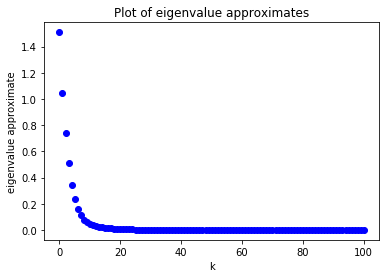

In [142]:
# Convert k_list and approx_eigenvalues to numpy arrays
k_list = np.array(k_list)
approx_eigenvalues = np.array(approx_eigenvalues)
plt.plot(k_list, eigvalue - approx_eigenvalues, "ob", label="approximate eigenvalues")
plt.xlabel("k")
plt.ylabel("eigenvalue approximate")
plt.title("Plot of eigenvalue approximates")
plt.show()

To better see what is going on, we can plot the above graph on a log scale.

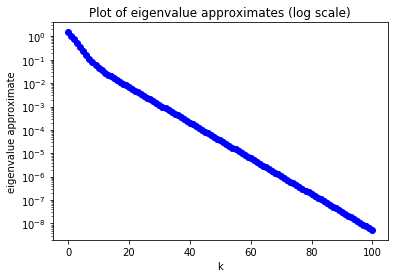

In [143]:
# Convert k_list and approx_eigenvalues to numpy arrays
k_list = np.array(k_list)
approx_eigenvalues = np.array(approx_eigenvalues)
plt.plot(k_list, eigvalue - approx_eigenvalues, "ob", label="approximate eigenvalues")
plt.xlabel("k")
plt.ylabel("eigenvalue approximate")
plt.title("Plot of eigenvalue approximates (log scale)")
plt.yscale("log")
plt.show()

The fact that the graph is asymptotic to a downward sloping line means that our eigenvalues approximates are approaching the true eigenvalue exponentially quickly (with exponent related to the slope of the line).

Now we turn our attention to our approximate eigenvectors $x_k$. Since these values are approaching `eigenvector`, we can look at the norm of the difference of `eigenvector` and $x^k$. This is our error in eigenvector approximation.

In [144]:
eigenvector_error = []
for x_k in approx_eigenvectors:
    eigenvector_error.append(np.linalg.norm(eigenvector - x_k))
# Convert to a numpy array:
eigenvector_error = np.array(eigenvector_error)

We plot these errors:

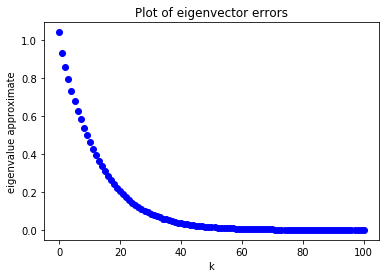

In [145]:
plt.plot(k_list, eigenvector_error, "ob", label="eigenvector error")
plt.xlabel("k")
plt.ylabel("eigenvalue approximate")
plt.title("Plot of eigenvector errors")
plt.show()

We switch to a log scale:

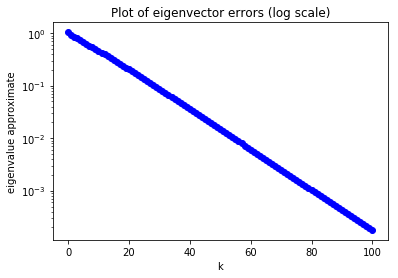

In [146]:
plt.plot(k_list, eigenvector_error, "ob", label="eigenvector error")
plt.xlabel("k")
plt.ylabel("eigenvalue approximate")
plt.title("Plot of eigenvector errors (log scale)")
plt.yscale("log")
plt.show()

Again, we can see that the error is decaying exponentially.

### Finding a  dominant eigenvalue

Here we rigorously spell out the algorithm we have been describing above.

It is useful to know that a matrix $A$ and its transpose $A^T$ are conjugate. (That is there is an invertible matrix $P$ such that $A^T=P A P^{-1}$.) Conjugate matrices have the same eigenvalues and the same multiplicity of eigenvectors.

<div style="background: #FFB"><h4>Theorem: The power method of finding a dominant eigenvalue.</h4>
Suppose $\lambda_{\max}$ is the dominant eigenvalue of the square matrix $A$, i.e., $\lambda_{\max}$ is an eigenvalue and all other eigenvalues satisfy $|\lambda|<|\lambda_{\max}|$. Suppose also that the algebraic multiplicity of $\lambda_{\max}$ is one. Suppose $v$ and $w$ are unit vectors satisfying $A v = \lambda_\max v$ and $A^T w = \lambda_\max w$. Let $x$ be any vector such that $w \cdot x \neq 0$. Define the sequence of vectors by $x^0 = x/\|x\|$ and 
    $$x^{k+1} = \frac{A x^k}{\|A x^k\|} \quad \text{for $k \geq 0$}.$$
Then $x^k$ converges exponentially to $\pm v$, and the sequence of eigenvalue approximates $x^k \cdot (A x^k)$ converges exponentially to $\lambda_\max$.
</div>

**Remark:** The condition that $w \cdot x=0$ means you can't use just any initial vector $x$. Also, of course we don't want to assume we know $w$. But, it is very unlikely if you choose $x$ at random that $w \cdot x=0$. This is why we have been using random vectors for $x$.

The algorithm in the Theorem above is basically the same as the Algorithm 8 of TAK &sect; 4.6.

## Finding the eigenvalue with smallest magnitude

Suppose $A$ is invertible. Observe that if
$A v = \lambda v$ then
$$A^{-1} v = \frac{1}{\lambda} v.$$
This means that we can apply the power method with $A^{-1}$ to find the eigenvalue with smallest absolute value.

However, instead of using the inverse, we use $LU$ factorization. The algorithm is spelled out in Algorithm 9 of TAK &sect; 4.6.

Let's find the smallest eigenvalue of the matrix $A$ as above.

In [147]:
A

array([[-0.25171678,  0.58924155, -0.32522934,  0.92260052],
       [ 0.58924155,  0.99124496, -0.85124213, -0.93359258],
       [-0.32522934, -0.85124213,  0.74766801, -0.79890941],
       [ 0.92260052, -0.93359258, -0.79890941,  0.66430218]])

First we compute the $LU$ factorization. We'll use the `linalg` module from `scipy`, and use a slightly different function so we can make use of the packages abilities to solve equations.

In [159]:
LU_data = linalg.lu_factor(A)
LU_data

(array([[ 0.92260052, -0.93359258, -0.79890941,  0.66430218],
        [ 0.63867464,  1.58750687, -0.34099895, -1.35786554],
        [-0.27283399,  0.21072398, -0.47134232,  1.38997957],
        [-0.35251371, -0.74352202, -0.45084274, -0.94767452]]),
 array([3, 1, 3, 3], dtype=int32))

Our variable `LU_data` stores the information of the $PLU$-factorization. The pair consists of a matrix storing $L+U-I$ and a vector representing the permutation matrix $P$. You can find out more by typing the following command into jupyter:
```python
linalg.lu_factor?
```

Recall that we use $LU$-factorization to efficiently solve the equation $Ay=b$ for $y$. The `linalg` module in `scipy` has a function that does this for us. For example:

In [163]:
b = np.array([1, 2, 3, 4])
y = linalg.lu_solve(LU_data, b)
y

array([-18.69186611,  -9.2000159 , -20.22280509,  -5.26888297])

To check that it worked observe:

In [164]:
A @ y

array([1., 2., 3., 4.])

Here we apply the power method to find the smallest eigenvalue and eigenvector pair. We'll start with the same random vector $x$ as before.

In [172]:
x

array([-0.79842236, -0.50141247,  0.21444716,  0.64910438])

We take $x^0$ to be $x$ rescaled to have unit length:

In [173]:
k = 0
x_k = x / np.linalg.norm(x)

Then we iterate backward $100$ times.

In [174]:
for i in range(100):
    temp = linalg.lu_solve(LU_data, x_k)
    k += 1
    x_k = temp / np.linalg.norm(temp)
print("x_{} = {}".format(k, x_k))

x_100 = [-0.69440134 -0.26041893 -0.65244138 -0.15591346]


Again because `x_100` is a unit vector, we can find the associated eigenvalue by computing  the following:

In [175]:
eigvalue = x_k @ A @ x_k
eigvalue

-0.1291616943141207

To see that $x_100$ is an approximate eigenvalue observe:

In [176]:
A @ x_k - eigvalue * x_k

array([ 2.77555756e-17, -3.46944695e-17,  0.00000000e+00,  1.17961196e-16])

The above is so small that the quantity above looks like round off error.

In [178]:
A

array([[-0.25171678,  0.58924155, -0.32522934,  0.92260052],
       [ 0.58924155,  0.99124496, -0.85124213, -0.93359258],
       [-0.32522934, -0.85124213,  0.74766801, -0.79890941],
       [ 0.92260052, -0.93359258, -0.79890941,  0.66430218]])

So that we can use it later, we organize the above algorithm into a function. This essentially implements Algorithm 9 of TAK.

In [181]:
def smallest_magnitude_eigenvalue(A, epsilon):
    ''' This function returns a pair consisting of an eigenvalue and an 
        eigenvector. The eigenvalue returned is the eigenvalue of smallest
        absolute value. We use the power method and LU-factorization iterating
        until two consequtive eigenvalue estimates are within epsilon of each other.
    '''
    n = A.shape[0]
    assert A.shape == (n,n), "A should be a square matrix."
    x = 2*np.random.random(n)-1
    LU_data = linalg.lu_factor(A)
    k = 0
    x_k = x / np.linalg.norm(x)
    eigenvalue_old_est = float('inf')
    eigenvalue_est = x_k @ A @ x_k
    while abs(eigenvalue_est - eigenvalue_old_est) >= epsilon:
        temp = linalg.lu_solve(LU_data, x_k)
        k += 1
        x_k = temp / np.linalg.norm(temp)
        eigenvalue_old_est = eigenvalue_est
        eigenvalue_est = x_k @ A @ x_k
    return eigenvalue_est, x_k

We test it using the same matrix as before.

In [182]:
eigenvalue, eigenvector = smallest_magnitude_eigenvalue(A, 10**-8)

In [183]:
eigenvalue

-0.12916169431738653

In [184]:
A @ eigenvector - eigenvalue * eigenvector

array([-9.50035655e-07,  1.28149907e-06,  8.78627949e-08,  1.72311849e-06])

It seemed to work.

## Finding other eigenvalues

To find other eigenvalues we can use the following trick. If $A$ is a matrix and $A v = \lambda v$ then we also have
$$(A - cI) v = (\lambda-c)v.$$
That is $A$ and $A-c I$ have the same eigenvectors, and eigenvalues are shifted by subtracting $c$.

Let's use this to find the other eigenvalues of $A$. We first found a largest magnitude eigenvalue&ndash;eigenvector pair:

In [185]:
eigvalue_0 = 1.9499535745247238
vect_0 = np.array([-0.37108228, -0.55544271,  0.68572761, -0.28906573])

We found the smallest magnitude pair above. We repeat the calculation here:

In [187]:
eigvalue_1, vect_1 = smallest_magnitude_eigenvalue(A, 10**-12)
eigvalue_1

-0.12916169431412128

Since **real symmetric matrices have all real eigenvalues**, the other eigenvalues must be in the union of intervals $[-1.949\ldots, -0.1291\ldots] \cup [0.1291\ldots, 1.949\ldots]$. We can look for eigenvalues in the center of these intervals. First we set `c` to be the center of the interval $[-1.949\ldots, -0.1291\ldots]$:

In [189]:
c = (-eigvalue_0 + eigvalue_1)/2
c

-1.0395576344194226

To find the eigenvalue, eigenvector pair nearest to $c$, we can find the smallest eigenvalue for $A-cI$.

In [194]:
temp_eigvalue, vect = smallest_magnitude_eigenvalue(A - c*np.identity(4), 10**-12)

Because of the shift, the actual eigenvalue should be obtained by adding $c$.

In [197]:
eigvalue = temp_eigvalue + c
eigvalue

-1.4548040942714102

Let's check if it worked.

In [198]:
A@vect - eigvalue*vect

array([2.84544605e-07, 1.06711865e-07, 2.67350792e-07, 6.38886958e-08])

These numbers are small, so it seemed to work. Let's store off our eigenvalue&ndash;eigenvector pair.

In [199]:
eigvalue_2 = eigvalue
vect_2 = vect

Let's check the other interval $[0.1291\ldots, 1.949\ldots]$ now. We set the midpoint to $c$:

In [201]:
c = (eigvalue_0 - eigvalue_1)/2

Now we look for the eigenvalue closest to $c$.

In [204]:
temp_eigvalue, vect = smallest_magnitude_eigenvalue(A - c*np.identity(4), 10**-12)
eigvalue = temp_eigvalue + c
eigvalue

1.785510592487924

In [205]:
A@vect - eigvalue*vect

array([-2.08027915e-07, -3.11232349e-07,  3.84046759e-07, -1.61974643e-07])

Again it seemed to work. We found a final eigenvalue eigenvector pair:

In [206]:
eigvalue_3 = eigvalue
vect_3 = vect

Since $A$ is $4 \times 4$, we found all the eigenvalue&ndash;eigenvector pairs. To check our work, we verify that we have diagonalized $A$. If we create a diagonal matrix $D$ with entries given by the eigenvalues and a matrix $P$ with columns given by the eigenvectors (in the same order), we should have the equation 
$$A = P D P^{-1}.$$

In [208]:
D = np.diag([eigvalue_0, eigvalue_1, eigvalue_2, eigvalue_3])
P = np.array([vect_0, vect_1, vect_2, vect_3]).transpose()

To check that the equation is satisfied, we can check that 
$$AP = PD.$$
(Though, this doesn't check that $P$ is invertible.) To check this equation, we observe that $AP - PD$ has all small entries.

In [211]:
A @ P - P @ D

array([[-1.66582370e-09,  1.60288668e-08,  2.84544605e-07,
        -2.08027915e-07],
       [ 4.69555528e-09, -1.53296454e-08,  1.06711865e-07,
        -3.11232349e-07],
       [ 5.18975019e-09, -7.18850650e-09,  2.67350792e-07,
         3.84046759e-07],
       [ 5.42714196e-09, -1.57026744e-08,  6.38886958e-08,
        -1.61974643e-07]])

It seems to work! The easiest way to check that $P$ is invertible is to see that the columns of $P$ are orthonormal. By construction the columns are unit vectors. To see they are pairwise orthogonal we compute their dot products.

In [213]:
for i in range(4):
    for j in range(i+1, 4):
        print(P[:,i] @ P[:,j])

3.1141575637660956e-09
2.325384745871517e-09
3.4082679064573185e-06
-3.3021975581748464e-07
-9.017504798425335e-10
-2.220446049250313e-16


All dot products of columns are nearly zero, so the columns form an (approximate) orthonormal basis for ${\mathbb R}^4$. We conclude that $P$ is invertible. (Any collection of non-zero pairwise orthogonal vectors is linearly independent, since the projection of any vector to the span of the others is the zero vector.)

**Remark:** It is a theorem that symmetric matrices are orthogonally diagonalizable. If all eigenvalues of a symmetric matrix have algebraic multiplicity one, then whenever $A=PDP^{-1}$, the matrix $P$ will have orthogonal columns.